In [1]:
#Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
#Define and load file 
salaries_path = "data/Salaries.csv"
salaries = pd.read_csv(salaries_path)

#Display sample data 
salaries.head(10)

C:\Users\alexa\AppData\Local\Temp\ipykernel_19420\3032234693.py:3: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  salaries = pd.read_csv(salaries_path)


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
5,6,DAVID SULLIVAN,ASSISTANT DEPUTY CHIEF II,118602.0,8601.0,189082.74,NaN,316285.74,316285.74,2011,NaN,San Francisco,NaN
6,7,ALSON LEE,"BATTALION CHIEF, (FIRE DEPARTMENT)",92492.01,89062.9,134426.14,NaN,315981.05,315981.05,2011,NaN,San Francisco,NaN
7,8,DAVID KUSHNER,DEPUTY DIRECTOR OF INVESTMENTS,256576.96,0.0,51322.5,NaN,307899.46,307899.46,2011,NaN,San Francisco,NaN
8,9,MICHAEL MORRIS,"BATTALION CHIEF, (FIRE DEPARTMENT)",176932.64,86362.68,40132.23,NaN,303427.55,303427.55,2011,NaN,San Francisco,NaN
9,10,JOANNE HAYES-WHITE,"CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)",285262.0,0.0,17115.73,NaN,302377.73,302377.73,2011,NaN,San Francisco,NaN


In [3]:
num_rows_original = salaries.shape[0]
print(f'The number of rows in this dataframe is : {num_rows_original}')

The number of rows in this dataframe is : 148654


In [4]:
#Get all the years within the dataset 
unique_years = salaries['Year'].unique()

#Display
unique_years

array([2011, 2012, 2013, 2014], dtype=int64)

We decide to choose 2014 as it has the richest amount of data and are able to use most of the columns as features for machine learning.

In [5]:
#Create Dataframe for 2011 using df_2011
df_2014 = salaries[salaries['Year'] == 2014]

#Display df_2011
df_2014

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110531,110532,David Shinn,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
110532,110533,Amy P Hart,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT
110533,110534,William J Coaker Jr.,Chief Investment Officer,257340.0,0.0,82313.7,96570.66,339653.70,436224.36,2014,NaN,San Francisco,PT
110534,110535,Gregory P Suhr,Chief of Police,307450.04,0.0,19266.72,91302.46,326716.76,418019.22,2014,NaN,San Francisco,FT
110535,110536,Joanne M Hayes-White,"Chief, Fire Department",302068.0,0.0,24165.44,91201.66,326233.44,417435.10,2014,NaN,San Francisco,FT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


We are dropping the columns ID and EmployeeName as it is not needed. We will not need it for the preparation for machine learning. 

In [6]:
#Drop ID and EmployeeName
df_2014 = df_2014.drop(columns=['Id', 'EmployeeName'])
#Display
df_2014

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110531,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
110532,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT
110533,Chief Investment Officer,257340.0,0.0,82313.7,96570.66,339653.70,436224.36,2014,NaN,San Francisco,PT
110534,Chief of Police,307450.04,0.0,19266.72,91302.46,326716.76,418019.22,2014,NaN,San Francisco,FT
110535,"Chief, Fire Department",302068.0,0.0,24165.44,91201.66,326233.44,417435.10,2014,NaN,San Francisco,FT
...,...,...,...,...,...,...,...,...,...,...,...
148649,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [7]:
#Show the Not Provided within the dataset 
not_provided_job = (df_2014['JobTitle'] == 'Not provided').sum()
not_provided_base = (df_2014['BasePay'] == 'Not Provided').sum()
not_provided_overtime = (df_2014['OvertimePay'] == 'Not Provided').sum()
not_provided_other = (df_2014['OtherPay'] == 'Not Provided').sum()
not_provided_total = (df_2014['TotalPay'] == 'Not Provided').sum()

print(f'Total Not Provided for JobTitle: {not_provided_job}')
print(f'Total Not Provided for BasePay: {not_provided_base}')
print(f'Total Not Provided for OvertimePay: {not_provided_overtime}')
print(f'Total Not Provided for OtherPay: {not_provided_other}')
print(f'Total Not Provided for TotalPay: {not_provided_total}')

Total Not Provided for JobTitle: 4
Total Not Provided for BasePay: 4
Total Not Provided for OvertimePay: 4
Total Not Provided for OtherPay: 4
Total Not Provided for TotalPay: 0


We dropped any rows that included "Not Provided" as it does not benefit our data. 

In [8]:
#Removing unwanted rows
df_2014 = df_2014[~df_2014['JobTitle'].isin(['Not provided', 'Not Provided']) &  
                  ~df_2014['OvertimePay'].isin(['Not provided', 'Not Provided']) & 
                  ~df_2014['OtherPay'].isin(['Not provided', 'Not Provided']) & 
                  ~df_2014['BasePay'].isin(['Not provided', 'Not Provided'])]

print("\nDataFrame after removing unwanted rows:")
df_2014


DataFrame after removing unwanted rows:


,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
110531,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,2014,NaN,San Francisco,PT
110532,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,2014,NaN,San Francisco,FT
110533,Chief Investment Officer,257340.0,0.0,82313.7,96570.66,339653.70,436224.36,2014,NaN,San Francisco,PT
110534,Chief of Police,307450.04,0.0,19266.72,91302.46,326716.76,418019.22,2014,NaN,San Francisco,FT
110535,"Chief, Fire Department",302068.0,0.0,24165.44,91201.66,326233.44,417435.10,2014,NaN,San Francisco,FT
...,...,...,...,...,...,...,...,...,...,...,...
148645,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148647,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148648,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148649,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT


In [9]:
#Checking the df_2011 information 
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38119 entries, 110531 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JobTitle          38119 non-null  object 
 1   BasePay           38119 non-null  object 
 2   OvertimePay       38119 non-null  object 
 3   OtherPay          38119 non-null  object 
 4   Benefits          38119 non-null  object 
 5   TotalPay          38119 non-null  float64
 6   TotalPayBenefits  38119 non-null  float64
 7   Year              38119 non-null  int64  
 8   Notes             0 non-null      float64
 9   Agency            38119 non-null  object 
 10  Status            38119 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 3.5+ MB


From the info, we decided to drop the column Agency - as it we are able to justify that all rows were under the agency of San Francisco, the year - because we already selected the data to focus soley on 2014 and Notes due to it having 0 non-nulls or of no value.  

In [10]:
#Showing if San Francicso shows up for all rows
agency_is_sf = (df_2014['Agency'] == 'San Francisco').sum()
print(f'The number of rows that contain San Francisco in the Agency column is: {agency_is_sf}')

The number of rows that contain San Francisco in the Agency column is: 38119


In [11]:
#Drop Benefits, Notes and Status
df_2014 = df_2014.drop(columns=['Notes','Year','Agency'])
#Display
df_2014

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Status
110531,Deputy Chief 3,129150.01,0.0,342802.63,38780.04,471952.64,510732.68,PT
110532,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,FT
110533,Chief Investment Officer,257340.0,0.0,82313.7,96570.66,339653.70,436224.36,PT
110534,Chief of Police,307450.04,0.0,19266.72,91302.46,326716.76,418019.22,FT
110535,"Chief, Fire Department",302068.0,0.0,24165.44,91201.66,326233.44,417435.10,FT
...,...,...,...,...,...,...,...,...
148645,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,PT
148647,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,PT
148648,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,PT
148649,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,PT


In [12]:
#Display after drops
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38119 entries, 110531 to 148653
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JobTitle          38119 non-null  object 
 1   BasePay           38119 non-null  object 
 2   OvertimePay       38119 non-null  object 
 3   OtherPay          38119 non-null  object 
 4   Benefits          38119 non-null  object 
 5   TotalPay          38119 non-null  float64
 6   TotalPayBenefits  38119 non-null  float64
 7   Status            38119 non-null  object 
dtypes: float64(2), object(6)
memory usage: 2.6+ MB


Converting all of the columns that have a numeric value like BasePay, OvertimePay, OtherPay and Benefits to float64 as the linear model does not take object types. 

In [13]:
#Converting the objects to a float64
df_2014['BasePay'] = df_2014['BasePay'].astype('float64')
df_2014['OvertimePay'] = df_2014['OvertimePay'].astype('float64')
df_2014['OtherPay'] = df_2014['OtherPay'].astype('float64')
df_2014['Benefits'] = df_2014['Benefits'].astype('float64')

In [14]:
#Display after converting 
df_2014.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38119 entries, 110531 to 148653
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   JobTitle          38119 non-null  object 
 1   BasePay           38119 non-null  float64
 2   OvertimePay       38119 non-null  float64
 3   OtherPay          38119 non-null  float64
 4   Benefits          38119 non-null  float64
 5   TotalPay          38119 non-null  float64
 6   TotalPayBenefits  38119 non-null  float64
 7   Status            38119 non-null  object 
dtypes: float64(6), object(2)
memory usage: 2.6+ MB


In [15]:
#Number of rows after
num_rows = df_2014.shape[0]
print(f'The number of rows in the 2014 dataframe is : {num_rows}')

The number of rows in the 2014 dataframe is : 38119


In [16]:
#Checking for any remaining missing data 
df_2014.isna().sum()

JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Status              0
dtype: int64

In [17]:
#Displaying updated 2014 dataframe
df_2014

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Status
110531,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,PT
110532,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,FT
110533,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,PT
110534,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,FT
110535,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,FT
...,...,...,...,...,...,...,...,...
148645,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,PT
148647,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,PT
148648,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,PT
148649,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,PT


In [18]:
#Resetting the index
clean_df_2014 = df_2014.reset_index(drop=True)

#Display clean and updated dataframe
clean_df_2014

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Status
0,Deputy Chief 3,129150.01,0.00,342802.63,38780.04,471952.64,510732.68,PT
1,Asst Med Examiner,318835.49,10712.95,60563.54,89540.23,390111.98,479652.21,FT
2,Chief Investment Officer,257340.00,0.00,82313.70,96570.66,339653.70,436224.36,PT
3,Chief of Police,307450.04,0.00,19266.72,91302.46,326716.76,418019.22,FT
4,"Chief, Fire Department",302068.00,0.00,24165.44,91201.66,326233.44,417435.10,FT
...,...,...,...,...,...,...,...,...
38114,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,PT
38115,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,PT
38116,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,PT
38117,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,PT


# Box plot visual : 

We wanted to create a visual based on BasePay, OvertimePay, OtherPay, Benefits, TotalPay and the TotalPayBenefits to showcase the pay values in 2014.

In [19]:
clean_df_2014.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
count,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000,38119.000000
mean,66564.421924,5401.993737,3505.421251,24789.601756,75471.836912,100261.438668
std,44053.783972,11769.656257,7767.114151,15703.733930,51694.645115,66234.366433
min,0.000000,0.000000,-618.130000,-13.800000,-618.130000,-618.130000
25%,30138.055000,0.000000,0.000000,10269.975000,33468.125000,44254.935000
50%,65055.000000,0.000000,695.890000,28426.980000,72366.280000,101108.510000
75%,94735.050000,5113.430000,4098.135000,35445.100000,107977.950000,142749.585000
max,318835.490000,173547.730000,342802.630000,96570.660000,471952.640000,510732.680000


In [20]:
#Boxplot for Total Pay
total_pay = clean_df_2014['TotalPay']

quarantiles = total_pay.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 33468.125
The upper quarantile is: 107977.95
The interquarantile range is: 74509.825
The median is: 72366.28
If the pay value is below -78296.61249999999, they may be outliers
If the pay value is above 219742.6875, they may be outliers


In [21]:
#Boxplot for BasePay
base_pay = clean_df_2014['BasePay']

quarantiles = base_pay.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 30138.055
The upper quarantile is: 94735.05
The interquarantile range is: 64596.995
The median is: 65055.0
If the pay value is below -66757.4375, they may be outliers
If the pay value is above 191630.5425, they may be outliers


In [22]:
#Boxplot for Overtime Pay
overtime_pay = clean_df_2014['OvertimePay']

quarantiles = overtime_pay.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 0.0
The upper quarantile is: 5113.43
The interquarantile range is: 5113.43
The median is: 0.0
If the pay value is below -7670.145, they may be outliers
If the pay value is above 12783.575, they may be outliers


In [23]:
#Boxplot for Other Pay
other_pay = clean_df_2014['OtherPay']

quarantiles = other_pay.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 0.0
The upper quarantile is: 4098.135
The interquarantile range is: 4098.135
The median is: 695.89
If the pay value is below -6147.2025, they may be outliers
If the pay value is above 10245.337500000001, they may be outliers


In [24]:
#Boxplot for Benefits
benefits = clean_df_2014['Benefits']

quarantiles = benefits.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 10269.974999999999
The upper quarantile is: 35445.1
The interquarantile range is: 25175.125
The median is: 28426.98
If the pay value is below -27492.7125, they may be outliers
If the pay value is above 73207.7875, they may be outliers


In [25]:
#Boxplot for Total Pay Benefits
tpb = clean_df_2014['TotalPayBenefits']

quarantiles = tpb.quantile([0.25, 0.5, 0.75])
lower_q = quarantiles[0.25]
upper_q = quarantiles[0.75]
iqr = upper_q - lower_q

print(f'The lower quarantile is: {lower_q}')
print(f'The upper quarantile is: {upper_q}')
print(f'The interquarantile range is: {iqr}')
print(f'The median is: {quarantiles[0.5]}')

lower_bound = lower_q - (1.5*iqr)
upper_bound = upper_q + (1.5*iqr)

print(f'If the pay value is below {lower_bound}, they may be outliers')
print(f'If the pay value is above {upper_bound}, they may be outliers')

The lower quarantile is: 44254.935
The upper quarantile is: 142749.585
The interquarantile range is: 98494.65
The median is: 101108.51
If the pay value is below -103487.03999999998, they may be outliers
If the pay value is above 290491.55999999994, they may be outliers


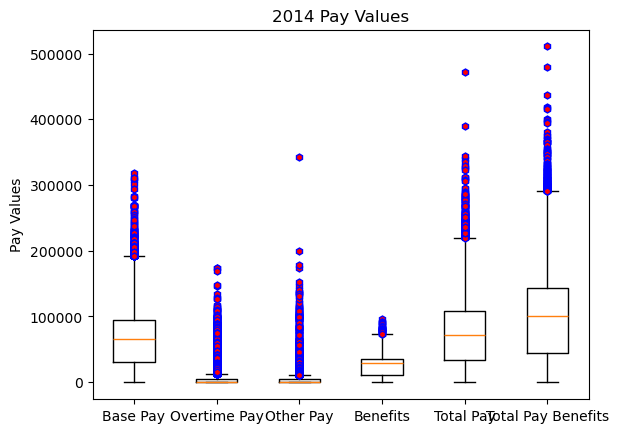

In [26]:
#Creating a plot with all the Pays Values in 2014
data_plotting = [base_pay, overtime_pay, other_pay, benefits, total_pay, tpb]
treatment = ['Base Pay', 'Overtime Pay', 'Other Pay', 'Benefits', 'Total Pay', 'Total Pay Benefits']
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Pay Values")
plt.title("2014 Pay Values")
red_dot = dict(markerfacecolor="r", markersize = 5, marker="h", markeredgecolor="b")
ax1.boxplot(data_plotting, flierprops = red_dot, labels=treatment, widths = 0.5, vert = True)

plt.show()

# Focusing on Nurses

 Nurses are always high in demand and is a profession that always have job openings, no matter what classification it is. In the city government job titles, we were able to find a variety of nurses and wanted to focus on creating it's own category. 

In [27]:
#Getting the count of the Jobtitles
relative_counts = clean_df_2014['JobTitle'].value_counts(normalize=False)
#Display
relative_counts.head(50)

JobTitle
Transit Operator                  2479
Special Nurse                     1478
Registered Nurse                  1234
Public Svc Aide-Public Works       916
Firefighter                        815
Custodian                          804
Police Officer 3                   783
Recreation Leader                  690
Patient Care Assistant             652
Deputy Sheriff                     617
Police Officer                     554
Public Service Trainee             494
HSA Sr Eligibility Worker          467
Attorney (Civil/Criminal)          386
Sergeant 3                         369
Porter                             361
General Laborer                    345
Police Officer 2                   335
Parking Control Officer            318
Senior Clerk                       314
EMT/Paramedic/Firefighter          311
Gardener                           297
Clerk                              268
Licensed Vocational Nurse          237
Library Page                       232
Junior Clerk    

In [28]:
# Define the list of nurse job titles
Nurse_job_titles = [
    'Special Nurse',
    'Registered Nurse',
    'Nurse Practitioner',
    'Licensed Vocational Nurse',
    'Nursing Assistant',
    'Nurse Manager',
    'Public Health Nurse',
    'Nursing Supervisor',
    'Clinical Nurse Specialist',
    'Nurses Staffing Assistant',
    'Nurse Midwife',
    'Nursery Specialist',
    'Nursing Supervisor Psychiatric',
    'Operating Room Nurse'
]

# Filter the DataFrame to collect rows with nurse-related job titles
nurse_jobs_df = clean_df_2014[clean_df_2014['JobTitle'].isin(Nurse_job_titles)]

#Reset Index
nurse_jobs_df =nurse_jobs_df.reset_index(drop=True)

# Display the filtered DataFrame
nurse_jobs_df


,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Status
0,Nursing Supervisor,199104.00,0.00,47099.71,62967.21,246203.71,309170.92,FT
1,Nursing Supervisor,205280.01,0.00,37590.20,65716.83,242870.21,308587.04,FT
2,Nursing Supervisor,205280.00,0.00,37590.20,62671.31,242870.20,305541.51,FT
3,Nurse Manager,179541.01,11301.12,45879.17,62284.42,236721.30,299005.72,FT
4,Nurse Manager,175179.00,0.00,59220.50,63603.32,234399.50,298002.82,FT
...,...,...,...,...,...,...,...,...
3570,Special Nurse,21.22,0.00,0.00,4.99,21.22,26.21,PT
3571,Special Nurse,19.97,0.00,0.00,4.30,19.97,24.27,PT
3572,Licensed Vocational Nurse,0.00,0.00,23.72,0.00,23.72,23.72,PT
3573,Registered Nurse,0.00,0.00,19.27,3.97,19.27,23.24,PT


# @ Jennifer 1st Visual 


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

#Jennifers Code Here 



# @Jennifer 2nd  visual - make a count plot for FT vs PT using the nurse_jobs_df

To get an understanding of the current data and to know the impact of employment status on salary - we wanted to make a comparison between nurses who worked full time vs part time. 

In [30]:
#Jennifers Code here 

Because we are relying on the employment status of the nurse and how it can impact their salary, we encoded the the status column where 0 is FT (Fulltime) and 1 is PT (Part-time) - this will convert our column into binary to prepare for machine learning. 

In [31]:
# load in from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Fit and transform the JobCategory column
nurse_jobs_df['Status_Binary'] = label_encoder.fit_transform(nurse_jobs_df['Status'])

In [32]:
#Display updated DataFrame 
nurse_jobs_df

,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Status,Status_Binary
0,Nursing Supervisor,199104.00,0.00,47099.71,62967.21,246203.71,309170.92,FT,0
1,Nursing Supervisor,205280.01,0.00,37590.20,65716.83,242870.21,308587.04,FT,0
2,Nursing Supervisor,205280.00,0.00,37590.20,62671.31,242870.20,305541.51,FT,0
3,Nurse Manager,179541.01,11301.12,45879.17,62284.42,236721.30,299005.72,FT,0
4,Nurse Manager,175179.00,0.00,59220.50,63603.32,234399.50,298002.82,FT,0
...,...,...,...,...,...,...,...,...,...
3570,Special Nurse,21.22,0.00,0.00,4.99,21.22,26.21,PT,1
3571,Special Nurse,19.97,0.00,0.00,4.30,19.97,24.27,PT,1
3572,Licensed Vocational Nurse,0.00,0.00,23.72,0.00,23.72,23.72,PT,1
3573,Registered Nurse,0.00,0.00,19.27,3.97,19.27,23.24,PT,1


In [33]:
#Drop columns as Status Binary is the replacement 
nurse_jobs_df = nurse_jobs_df.drop(columns=['Status'])

In [34]:
# Save the final dataframe to a CSV file
nurse_jobs_df.to_csv('NurseJobs.csv', index=False)

# Preparation for the Machine Learning

In [35]:
# Define the file path to your CSV file
file_path = r'NurseJobs.csv'

# Read the salary data from the CSV file
df_NurseJobs = pd.read_csv(file_path)

# Display the first few rows to check data
print(df_NurseJobs.head())

             JobTitle    BasePay  OvertimePay  OtherPay  Benefits   TotalPay  \
0  Nursing Supervisor  199104.00         0.00  47099.71  62967.21  246203.71   
1  Nursing Supervisor  205280.01         0.00  37590.20  65716.83  242870.21   
2  Nursing Supervisor  205280.00         0.00  37590.20  62671.31  242870.20   
3       Nurse Manager  179541.01     11301.12  45879.17  62284.42  236721.30   
4       Nurse Manager  175179.00         0.00  59220.50  63603.32  234399.50   

   TotalPayBenefits  Status_Binary  
0         309170.92              0  
1         308587.04              0  
2         305541.51              0  
3         299005.72              0  
4         298002.82              0  


In [36]:
# Define features (X) and target (y)
X = df_NurseJobs[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']]
y = df_NurseJobs['Status_Binary']

In [37]:
#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Logistic Regression Model:

In [38]:
#Logistic Regression Model
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [39]:
#Fit using the training data
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [40]:
#Score the model using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8566433566433567
Testing Data Score: 0.848951048951049


In [41]:
#Make predictions
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
5,1,1
6,0,1
7,0,0
8,1,1
9,1,1


In [42]:
#Calculate the accuracy score
from sklearn.metrics import accuracy_score

# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.848951048951049

# Confusion Matrix 

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[126,  55],
       [ 53, 481]], dtype=int64)

In [44]:
from sklearn.metrics import classification_report
target_names = ["Full Time", "Part Time"]
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

   Full Time       0.70      0.70      0.70       181
   Part Time       0.90      0.90      0.90       534

    accuracy                           0.85       715
   macro avg       0.80      0.80      0.80       715
weighted avg       0.85      0.85      0.85       715



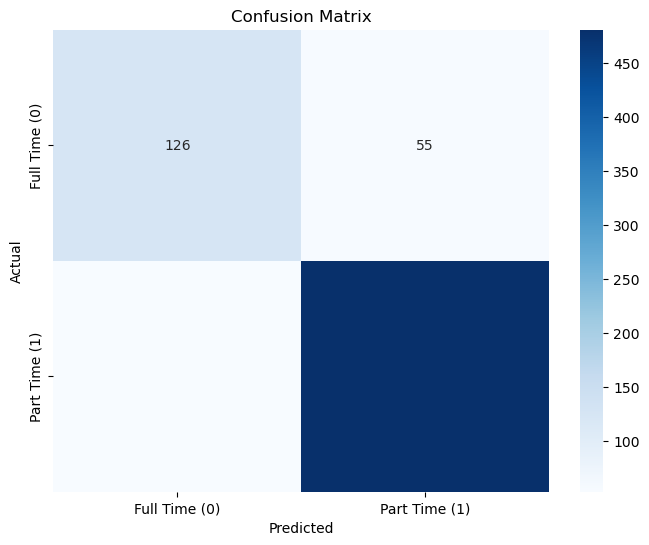

In [45]:
# Calculate the confusion matrix
cm= confusion_matrix(y_test, predictions)

cm_df = pd.DataFrame(
    cm, index=['Full Time (0)', 'Part Time (1)'], columns=['Full Time (0)', 'Part Time (1)']
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Full Time (0)', 'Part Time (1)'], 
            yticklabels=['Full Time (0)', 'Part Time (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Creating StandardScaler instance
scaler = StandardScaler()

In [47]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [48]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
rf_model = RandomForestClassifier(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)


print(classification_report(y_test, y_pred_rf, target_names=['Full Time', 'Part Time']))

              precision    recall  f1-score   support

   Full Time       0.92      0.92      0.92       181
   Part Time       0.97      0.97      0.97       534

    accuracy                           0.96       715
   macro avg       0.95      0.95      0.95       715
weighted avg       0.96      0.96      0.96       715



# Hyperparameter Tuning

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt','log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', 
                           verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_rf = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters found: ", best_params)

# Evaluate the tuned model
y_pred_best_rf = best_rf.predict(X_test)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


Model Evaluation

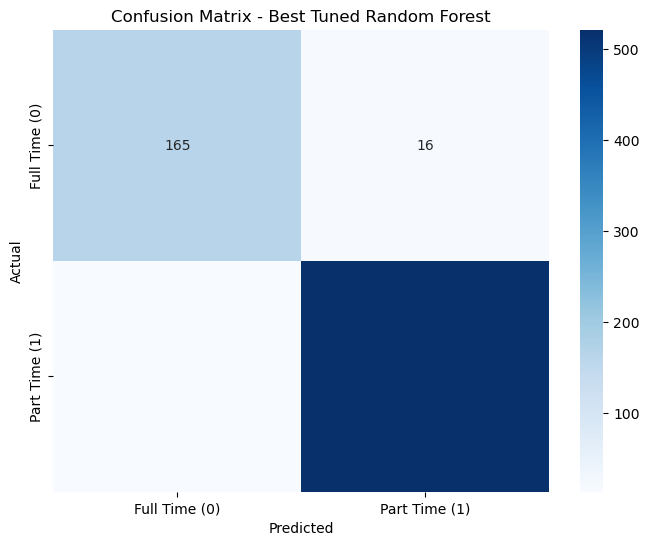

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       181
           1       0.97      0.98      0.97       534

    accuracy                           0.96       715
   macro avg       0.95      0.94      0.95       715
weighted avg       0.96      0.96      0.96       715



In [51]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions with the best-tuned Random Forest model
y_pred_best_rf = best_rf.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_best_rf)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Full Time (0)', 'Part Time (1)'], 
            yticklabels=['Full Time (0)', 'Part Time (1)'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Best Tuned Random Forest')
plt.show()

# Generate classification report
print(classification_report(y_test, y_pred_best_rf))

Comparison

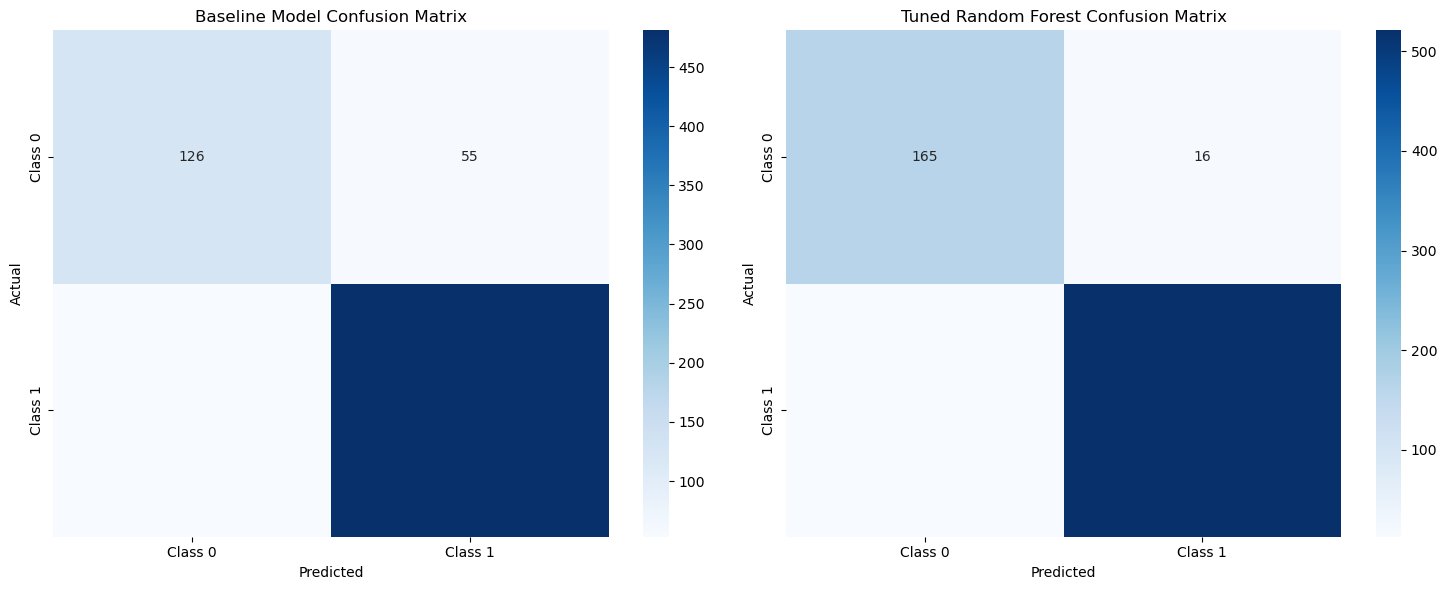

Baseline Classification Report:
               precision    recall  f1-score   support

   Full Time       0.70      0.70      0.70       181
   Part Time       0.90      0.90      0.90       534

    accuracy                           0.85       715
   macro avg       0.80      0.80      0.80       715
weighted avg       0.85      0.85      0.85       715

Random Forest Classification Report:
               precision    recall  f1-score   support

   Full Time       0.92      0.92      0.92       181
   Part Time       0.97      0.97      0.97       534

    accuracy                           0.96       715
   macro avg       0.95      0.95      0.95       715
weighted avg       0.96      0.96      0.96       715

Tuned Classification report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       181
           1       0.97      0.98      0.97       534

    accuracy                           0.96       715
   macro avg       0.95    

In [52]:
#baseline
predictions = classifier.predict(X_test)

# Assume these are your baseline and tuned model predictions
predictions = classifier.predict(X_test)  # Replace with your baseline model
y_pred_best_rf = best_rf.predict(X_test)

# Create confusion matrices
conf_matrix_baseline = confusion_matrix(y_test, predictions)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_best_rf)

# Plotting confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Baseline confusion matrix
sns.heatmap(conf_matrix_baseline, annot=True, fmt='d', cmap='Blues', 
            ax=axes[0], xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
axes[0].set_title('Baseline Model Confusion Matrix')
axes[0].set_ylabel('Actual')
axes[0].set_xlabel('Predicted')

# Tuned model confusion matrix
sns.heatmap(conf_matrix_tuned, annot=True, fmt='d', cmap='Blues', 
            ax=axes[1], xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
axes[1].set_title('Tuned Random Forest Confusion Matrix')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()




#Baseline Classification Report 
print("Baseline Classification Report:\n", classification_report(y_test, predictions, target_names=target_names))
#RandomForest Classsification Report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf, target_names=['Full Time', 'Part Time']))
# Generate Tuned classification report
print("Tuned Classification report:\n", classification_report(y_test, y_pred_best_rf))

## Feature Importance 

In [53]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.34934975060112067, 'BasePay'),
 (0.26484356611996324, 'Benefits'),
 (0.14958089766290703, 'TotalPayBenefits'),
 (0.09567653365087017, 'TotalPay'),
 (0.07314634584372555, 'OvertimePay'),
 (0.06740290612141331, 'OtherPay')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

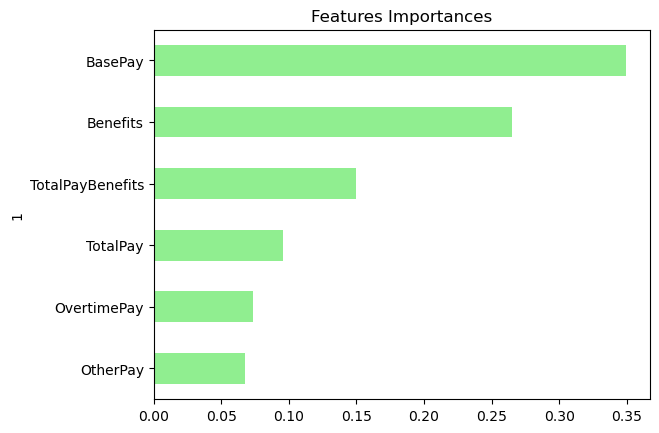

In [54]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)